In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv(r"E:\ny_housing_project\data\NY-House-Dataset-Cleaned.csv")


In [85]:
df.head()

,BROKERTITLE,PRICE,BEDS,BATH,PROPERTYSQFT,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,STATUS,PROPERTY_TYPE,ZIP,BOROUGH,PRICE_PER_SQFT,LUXURY
0,pantiga inc,265000,1,1.0,750.000000,"Parking lot, 875 Morrison Ave #3m, Bronx, NY 1...",40.821586,-73.874089,unknown,co op,10473,Bronx,353.333333,False
1,coldwell banker,350000,1,1.0,700.000000,"5800 Arlington Ave Apt 21s, Bronx, NY 10471, USA",40.907370,-73.906558,unknown,co op,10471,Bronx,500.000000,False
2,martino,349900,1,1.0,651.000000,"165 Cromwell Ave #2b, Staten Island, NY 10304,...",40.590206,-74.095803,unknown,condo,10304,Staten Island,537.480799,False
3,nest seekers long island,325000,1,1.0,2184.207862,"35-45 81st St e1, Jackson Heights, NY 11372, USA",40.750508,-73.885136,unknown,co op,11372,Queens,148.795362,False
4,du chris,230000,1,1.0,2184.207862,"33-24 Junction Blvd, Jackson Heights, NY 11372...",40.755769,-73.873423,unknown,co op,11372,Manhattan,105.301333,False


In [86]:
df_luxury = df[df['LUXURY']]
df_normal = df[~df['LUXURY']]

In [87]:
df_normal['BROKERTITLE'].value_counts()

BROKERTITLE
compass                          259
re/max                           246
keller williams                  195
corcoran                         174
douglas elliman                  167
                                ... 
homesmart premier living rlty      1
blue sky                           1
modern spaces                      1
belle maison inc                   1
exit premium                       1
Name: count, Length: 795, dtype: int64

In [88]:
df_normal['PROPERTY_TYPE'].value_counts()

PROPERTY_TYPE
co op                1197
house                 819
multi family home     575
condo                 458
other                 287
townhouse             107
land                   34
mobile home             1
Name: count, dtype: int64

In [89]:
df_normal.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,ZIP,PRICE_PER_SQFT
count,3.478000e+03,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000
mean,7.496205e+05,3.088269,2.015039,1818.694126,40.708934,-73.932341,10852.933583,439.829928
std,4.305112e+05,1.983242,1.172650,804.344146,0.093649,0.110760,541.678366,212.610591
min,4.950000e+04,1.000000,1.000000,230.000000,40.499546,-74.253033,10001.000000,45.325356
25%,3.990000e+05,2.000000,1.000000,1150.000000,40.628179,-73.981920,10309.000000,287.552374
50%,6.800000e+05,3.000000,2.000000,2184.207862,40.719317,-73.922288,11208.000000,411.792243
75%,9.890000e+05,4.000000,2.373861,2184.207862,40.771442,-73.854142,11360.000000,571.799806
max,1.999999e+06,19.000000,10.000000,7854.000000,40.911772,-73.702450,11697.000000,999.999091


# Exploratory Data Analysis (EDA)

## 1.1. Phân tích Định tính & Định lượng Cơ bản


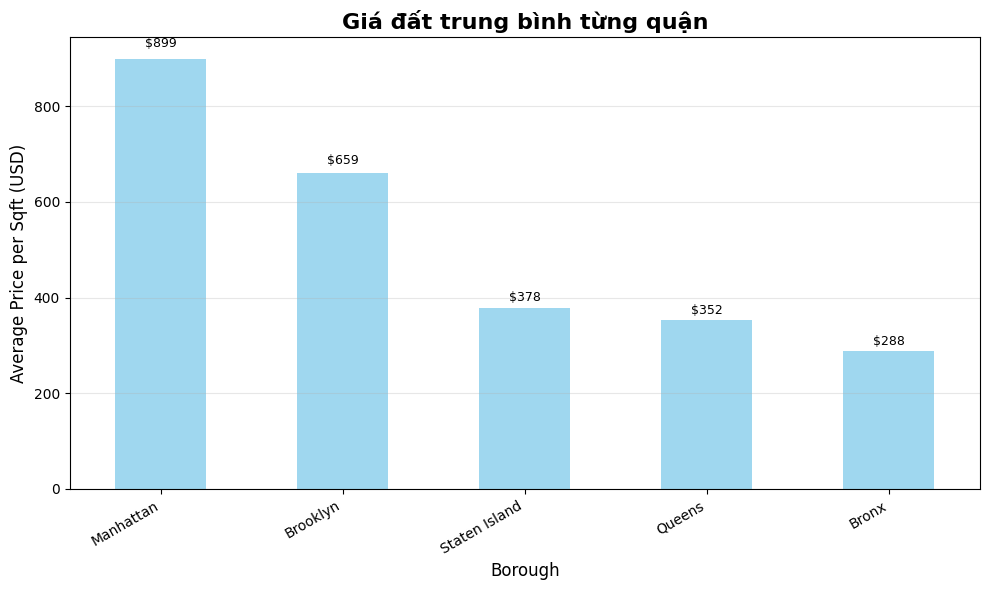

BOROUGH
Manhattan        898.58
Brooklyn         659.08
Staten Island    378.33
Queens           352.07
Bronx            288.40
Name: PRICE_PER_SQFT, dtype: float64


In [90]:
# tính trung bình theo quận
price_sqft_by_borough = df.groupby('BOROUGH')['PRICE_PER_SQFT'].mean().sort_values(ascending=False)

# vẽ bar chart
plt.figure(figsize=(10,6))
price_sqft_by_borough.plot(kind='bar', color='skyblue', alpha=0.8)

plt.title("Giá đất trung bình từng quận", fontsize=16, fontweight='bold')
plt.ylabel("Average Price per Sqft (USD)", fontsize=12)
plt.xlabel("Borough", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', alpha=0.3)

# thêm label trên cột
for i, val in enumerate(price_sqft_by_borough):
    plt.text(i, val * 1.02, f"${val:,.0f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print(price_sqft_by_borough.round(2))


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13036\3671596279.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



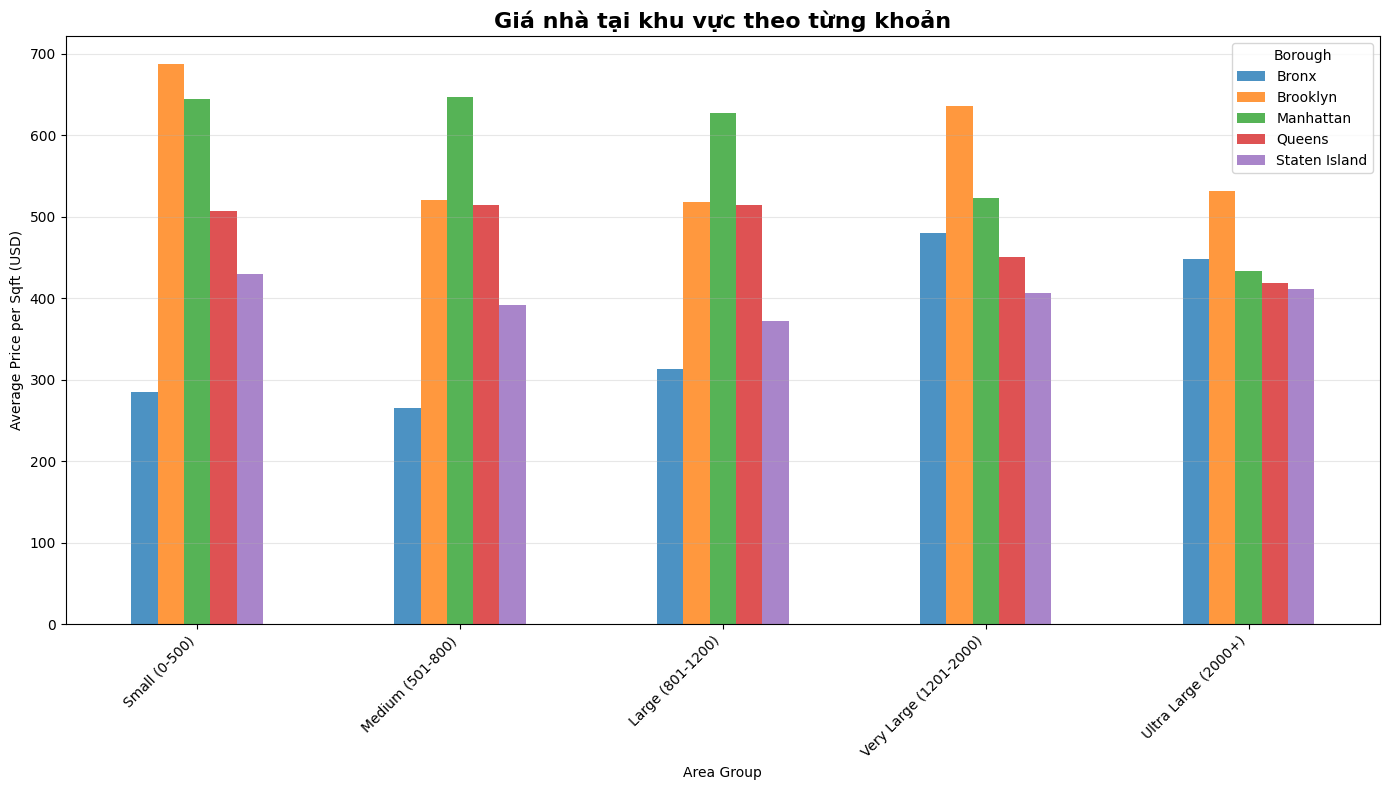

AreaGroup     Small (0-500) Medium (501-800) Large (801-1200)  \
BOROUGH                                                         
Bronx                 285.0       265.056806       313.466667   
Brooklyn         687.085925       520.851101       518.711155   
Manhattan        644.321383       647.488227        626.75152   
Queens           507.121907       513.928061       514.811165   
Staten Island    429.236106       392.002167       372.255734   

AreaGroup     Very Large (1201-2000) Ultra Large (2000+)  
BOROUGH                                                   
Bronx                     479.594279          447.584362  
Brooklyn                  636.316253          531.948426  
Manhattan                 522.841108          433.500447  
Queens                    450.706873          419.133176  
Staten Island             406.428099          411.498521  


In [91]:

df_clean = df_normal.copy()
df_clean['PROPERTYSQFT'] = df_clean['PROPERTYSQFT'].replace(2184.207862, pd.NA)
df_clean['PRICE_PER_SQFT'] = df_clean['PRICE'] / df_clean['PROPERTYSQFT']
df_clean = df_clean.dropna(subset=['PRICE_PER_SQFT'])
df_clean = df_clean[df_clean['PRICE_PER_SQFT'] > 0]

df_clean['AreaGroup'] = pd.cut(
    df_clean['PROPERTYSQFT'],
    bins=[0, 500, 800, 1200, 2000, float('inf')],
    labels=['Small (0-500)', 'Medium (501-800)', 'Large (801-1200)', 
            'Very Large (1201-2000)', 'Ultra Large (2000+)']
)

price_sqft_grouped = df_clean.groupby(['BOROUGH', 'AreaGroup'])['PRICE_PER_SQFT'].mean().unstack()

price_sqft_grouped.T.plot(kind='bar', figsize=(14, 8), alpha=0.8)

plt.title("Giá nhà tại khu vực theo từng khoản", fontsize=16, fontweight='bold')
plt.ylabel("Average Price per Sqft (USD)")
plt.xlabel("Area Group")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Borough")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(price_sqft_grouped.round(2))


In [92]:
# Giá trung bình / sqft theo quận & nhóm diện tích
price_sqft_grouped = df_clean.groupby(['BOROUGH', 'AreaGroup'])['PRICE_PER_SQFT'].mean().unstack()

print("Average Price per Sqft by Borough and Area Group:")
print(price_sqft_grouped.round(2))

# Tính tỷ lệ % thay đổi giữa các nhóm diện tích
price_sqft_change = price_sqft_grouped.pct_change(axis=1) * 100

print("\nPercentage change compared to previous Area Group:")
print(price_sqft_change.fillna('-').round(1))


Average Price per Sqft by Borough and Area Group:
AreaGroup     Small (0-500) Medium (501-800) Large (801-1200)  \
BOROUGH                                                         
Bronx                 285.0       265.056806       313.466667   
Brooklyn         687.085925       520.851101       518.711155   
Manhattan        644.321383       647.488227        626.75152   
Queens           507.121907       513.928061       514.811165   
Staten Island    429.236106       392.002167       372.255734   

AreaGroup     Very Large (1201-2000) Ultra Large (2000+)  
BOROUGH                                                   
Bronx                     479.594279          447.584362  
Brooklyn                  636.316253          531.948426  
Manhattan                 522.841108          433.500447  
Queens                    450.706873          419.133176  
Staten Island             406.428099          411.498521  

Percentage change compared to previous Area Group:
AreaGroup     Small (0-500)  

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13036\683740668.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13036\683740668.py:8: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



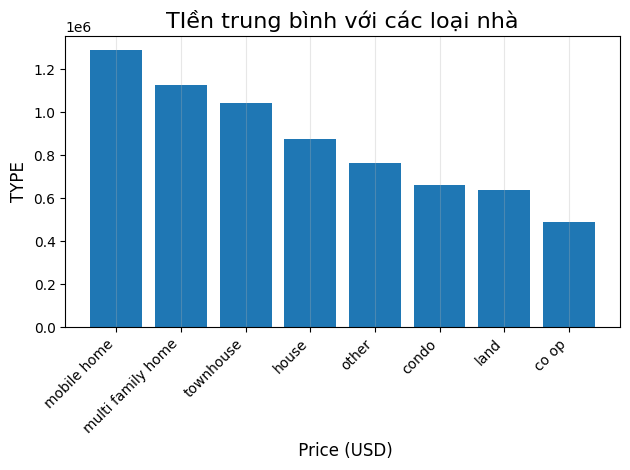

In [93]:
avg_type = df_normal.groupby("PROPERTY_TYPE")['PRICE'].mean().reset_index()
avg_type = avg_type.sort_values(by = "PRICE",ascending=False)
avg_type
plt.bar(avg_type['PROPERTY_TYPE'],avg_type['PRICE'])
plt.xticks(rotation=45, ha='right')
plt.title('TIền trung bình với các loại nhà', fontsize=16)
plt.xlabel(' Price (USD)', fontsize=12)
plt.ylabel('TYPE', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13036\4036172886.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



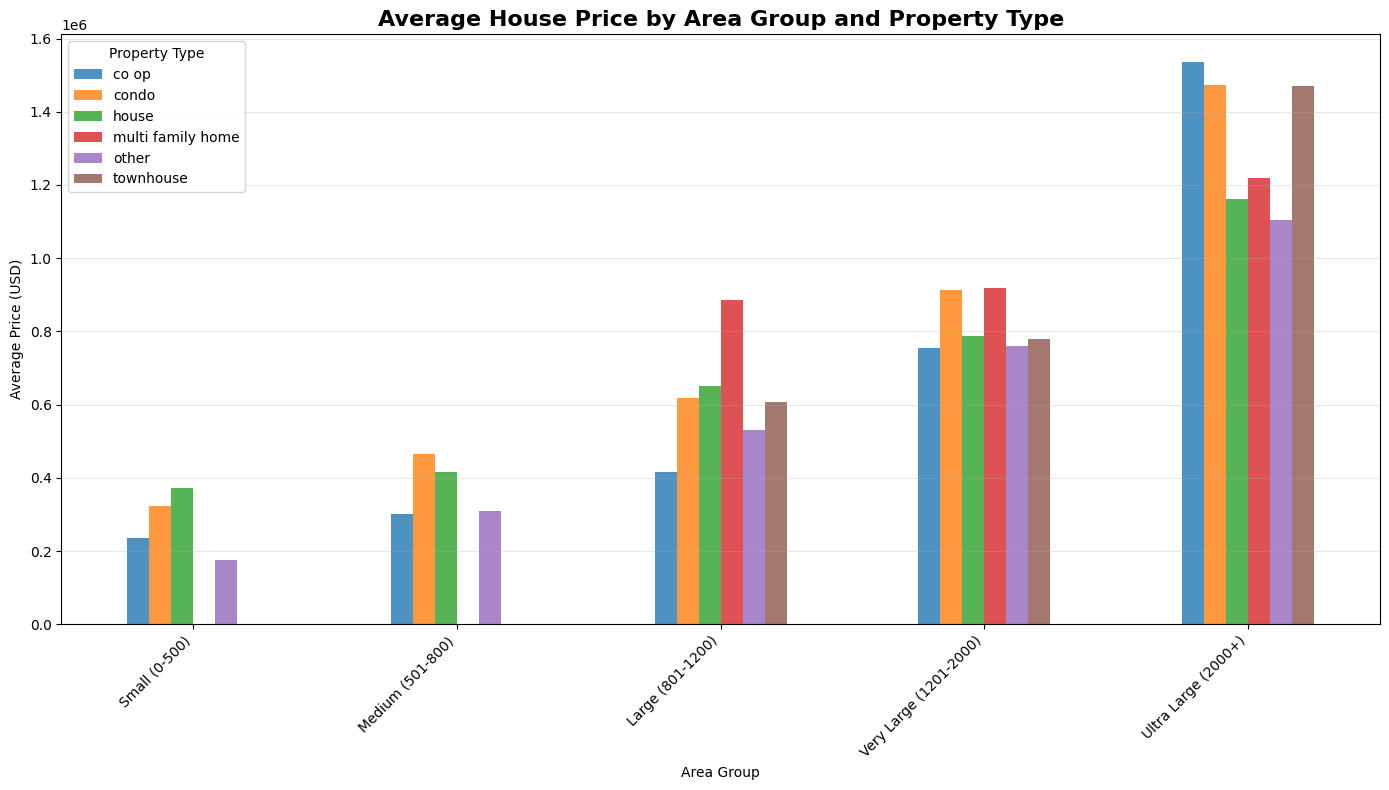

PROPERTY_TYPE                co op       condo       house  multi family home  \
AreaGroup                                                                       
Small (0-500)            234433.30   322153.77   372500.00                NaN   
Medium (501-800)         302387.93   465240.37   416615.23                NaN   
Large (801-1200)         417250.46   618827.49   651363.82          886000.00   
Very Large (1201-2000)   754788.75   912139.39   788461.60          918313.79   
Ultra Large (2000+)     1534875.00  1473199.80  1161205.61         1219855.86   

PROPERTY_TYPE                other   townhouse  
AreaGroup                                       
Small (0-500)            175647.83         NaN  
Medium (501-800)         310348.56         NaN  
Large (801-1200)         531481.69   607979.27  
Very Large (1201-2000)   760340.07   778809.58  
Ultra Large (2000+)     1103081.91  1471242.79  


In [94]:

price_by_area_type = df_clean.groupby(['AreaGroup', 'PROPERTY_TYPE'])['PRICE'].mean().unstack()

# vẽ chart
price_by_area_type.plot(kind='bar', figsize=(14, 8), alpha=0.8)

plt.title('Average House Price by Area Group and Property Type', fontsize=16, fontweight='bold')
plt.xlabel('Area Group')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Property Type')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(price_by_area_type.round(2))


In [95]:

print("Average Price per Sqft by Borough and Area Group:")
print(price_by_area_type.round(2))

# Tính tỷ lệ % thay đổi giữa các nhóm diện tích
price_sqft_change = price_by_area_type.pct_change(axis=1) * 100

print("\nPercentage change compared to previous Area Group:")
print(price_sqft_change.fillna('-').round(1))


Average Price per Sqft by Borough and Area Group:
PROPERTY_TYPE                co op       condo       house  multi family home  \
AreaGroup                                                                       
Small (0-500)            234433.30   322153.77   372500.00                NaN   
Medium (501-800)         302387.93   465240.37   416615.23                NaN   
Large (801-1200)         417250.46   618827.49   651363.82          886000.00   
Very Large (1201-2000)   754788.75   912139.39   788461.60          918313.79   
Ultra Large (2000+)     1534875.00  1473199.80  1161205.61         1219855.86   

PROPERTY_TYPE                other   townhouse  
AreaGroup                                       
Small (0-500)            175647.83         NaN  
Medium (501-800)         310348.56         NaN  
Large (801-1200)         531481.69   607979.27  
Very Large (1201-2000)   760340.07   778809.58  
Ultra Large (2000+)     1103081.91  1471242.79  

Percentage change compared to previous

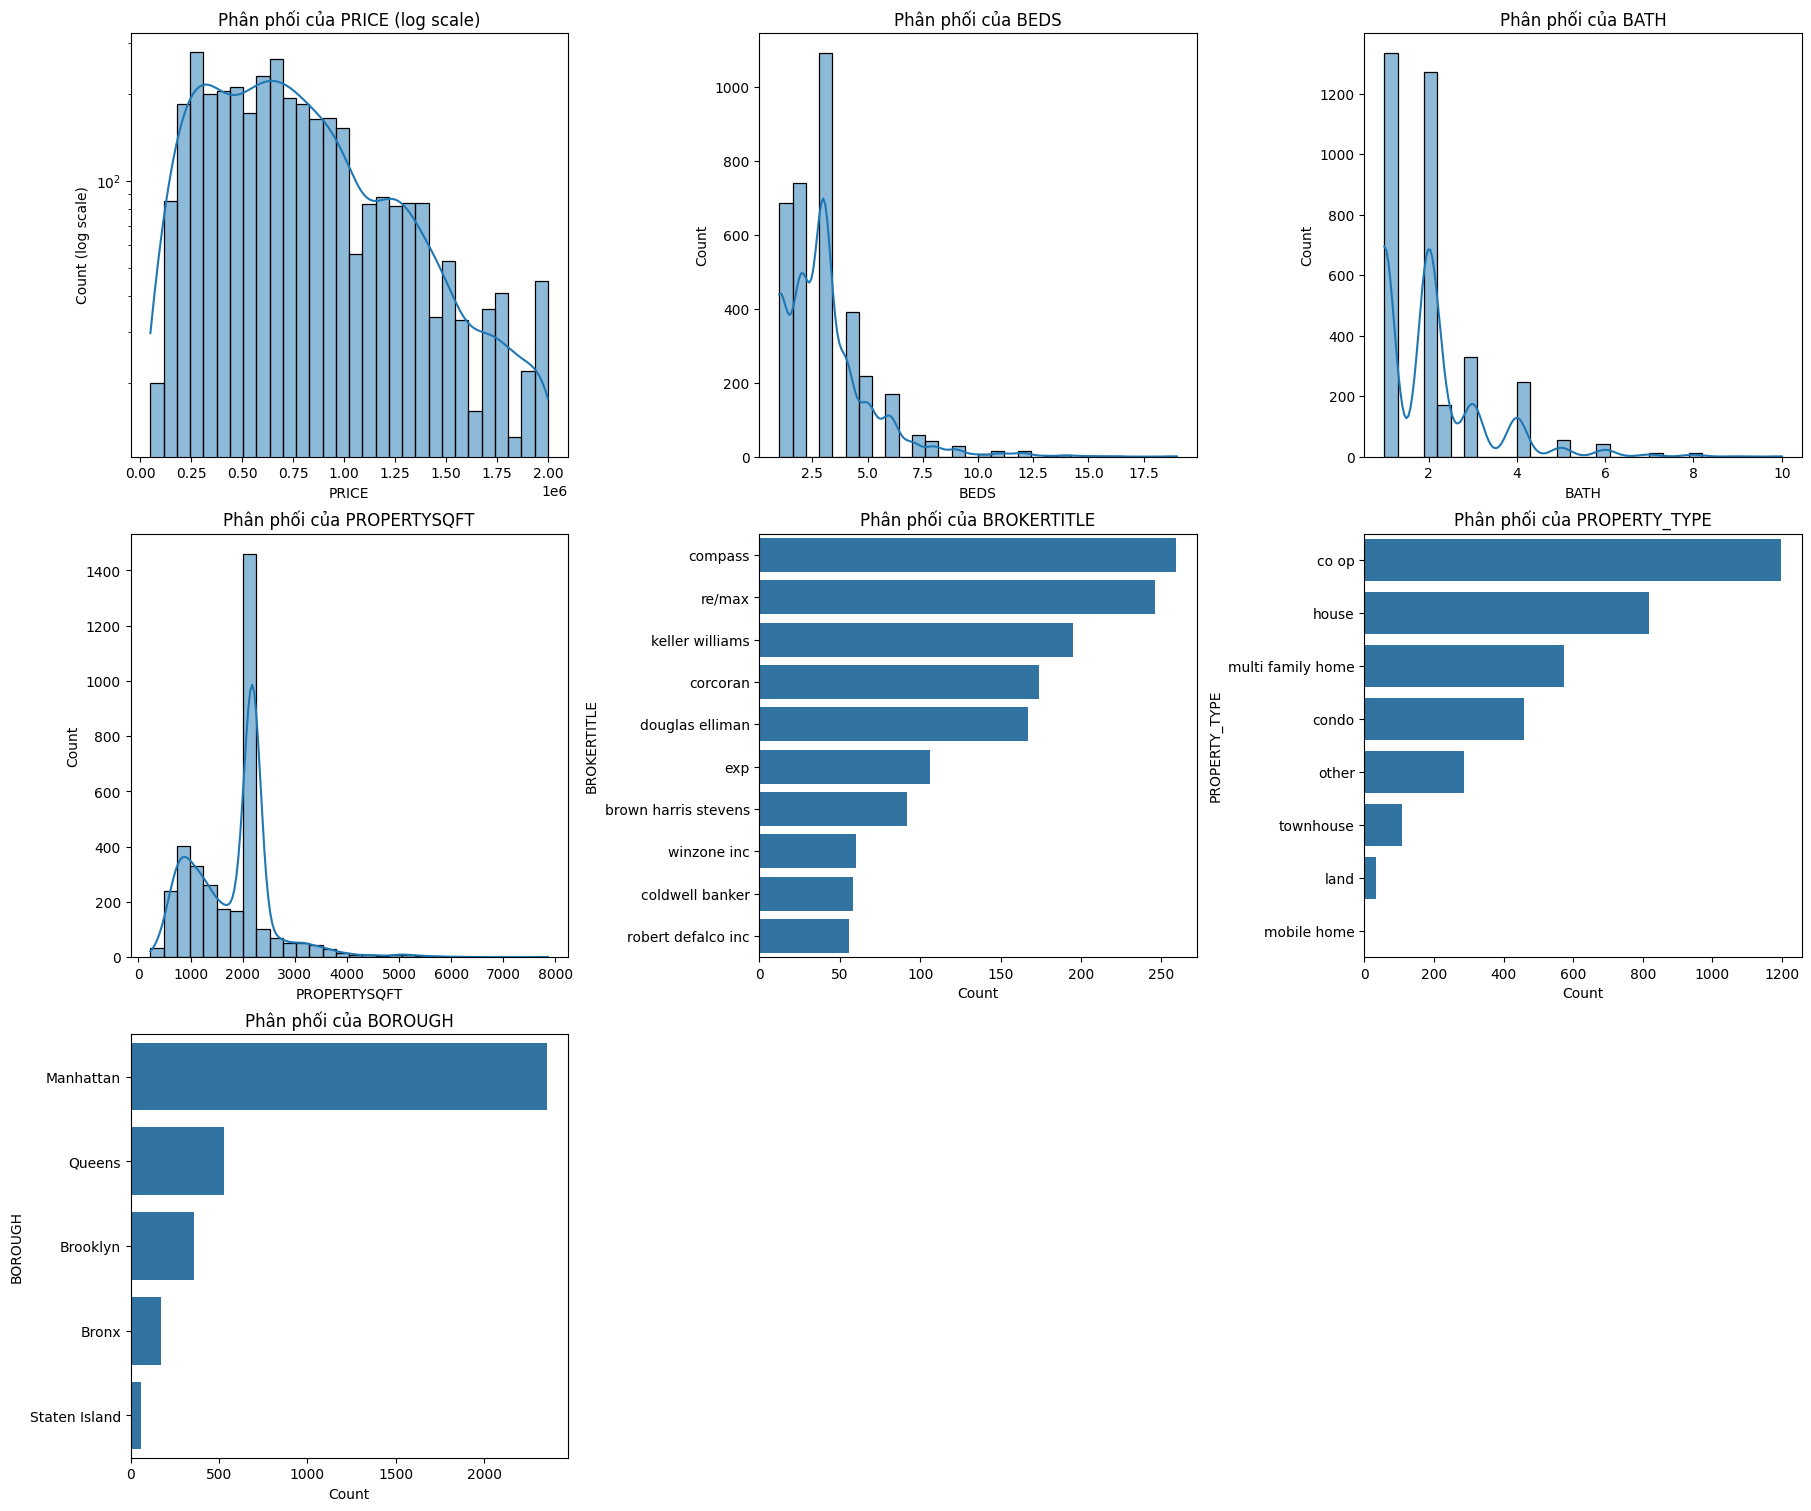

In [96]:
def plot_univariate_distribution(ax, df, column, plot_type='histogram'):
    if plot_type == 'histogram':
        sns.histplot(df[column], kde=True, bins=30, ax=ax)
        if column == 'PRICE':
            ax.set_yscale('log') 
            ax.set_title(f'Phân phối của {column} (log scale)')
            ax.set_ylabel('Count (log scale)')
        else:
            ax.set_title(f'Phân phối của {column}')
            ax.set_ylabel('Count')
        ax.set_xlabel(column)
    elif plot_type == 'countplot':
        sns.countplot(y=df[column], order=df[column].value_counts().index[:10], ax=ax)
        ax.set_title(f'Phân phối của {column}')
        ax.set_xlabel('Count')
        ax.set_ylabel(column)

# Danh sách các cột
numerical_cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']
categorical_cols = ['BROKERTITLE', 'PROPERTY_TYPE', 'BOROUGH']
all_cols = numerical_cols + categorical_cols

# Vẽ biểu đồ theo lưới 3 cột
n_cols = 3  
n_rows = (len(all_cols) + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()  

# Vẽ từng cột
for i, col in enumerate(all_cols):
    plot_type = 'histogram' if col in numerical_cols else 'countplot'
    plot_univariate_distribution(axes[i], df_normal, col, plot_type=plot_type)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

In [97]:
df = df_normal[df_normal['PROPERTYSQFT'] == 2184.207862]
df['PROPERTY_TYPE'].value_counts()

PROPERTY_TYPE
co op                625
house                228
multi family home    206
condo                104
other                 93
land                  34
townhouse             28
mobile home            1
Name: count, dtype: int64


## 1. Phân phối giá nhà (PRICE)
- Giá nhà phân bố **lệch phải mạnh** (right-skewed).  
- Hai cụm giá chính xuất hiện:
  - **0.5M – 1M USD**: chiếm đa số.
  - **1.5M – 2M USD**: tạo thành cụm phụ, thường là căn hộ/townhouse ở Manhattan hoặc Brooklyn.  
- Giá trên 2.5M giảm dần nhưng vẫn có một số trường hợp cao đến gần 7M (vẫn nằm trong phân khúc Normal, chưa tính Luxury).  

## 2. Phân phối số phòng ngủ (BEDS)
- Phần lớn nhà có **2–3 phòng ngủ**, đúng với phân khúc đại chúng.  
- Số lượng nhà từ 5 phòng trở lên giảm mạnh, hiếm gặp.  

## 3. Phân phối số phòng tắm (BATH)
- Tương tự phòng ngủ, phổ biến nhất là **1–2 phòng tắm**.  
- Từ 4 phòng tắm trở lên rất ít → chủ yếu thuộc nhóm diện tích lớn, giá cao hơn.  

## 4. Phân phối diện tích (PROPERTYSQFT)
- Phổ biến trong khoảng **500 – 1500 sqft**, phù hợp hộ gia đình nhỏ/ trung bình.  
- Có một “đuôi dài” với diện tích >2000 sqft, thường nằm ở nhóm giá cao hơn.  

## 5. Phân phối theo môi giới (BROKERTITLE)
- Một số broker lớn chiếm ưu thế: **RE/MAX, Compass, Corcoran, Douglas Elliman, Keller Williams**.  
- Các broker này chi phối phần lớn nguồn cung trên thị trường.  

## 6. Phân phối theo loại nhà (PROPERTY_TYPE)
- Chủ yếu là **condo, co-op, house**.  
- Các loại townhouse, multi-family home, land chiếm tỷ lệ nhỏ hơn.  

## 7. Phân phối theo khu vực (BOROUGH)
- **Manhattan áp đảo** về số lượng listing.  
- Theo sau là **Brooklyn, Queens**, trong khi Bronx và Staten Island chỉ chiếm tỷ trọng nhỏ.  

---

### 🔑 Insight chính từ phân tích đơn biến
1. **Giá nhà phổ thông ở NYC chia làm hai cụm chính**: 0.5M–1M và 1.5M–2M.  
2. **2–3 phòng ngủ, 1–2 phòng tắm, diện tích 500–1500 sqft** là đặc trưng chung.  
3. **Condo và co-op** là loại hình chiếm ưu thế → phản ánh nhu cầu thị trường đô thị.  
4. **Manhattan là trung tâm** của thị trường Normal segment, cả về số lượng và giá trị.  
5. Thị trường bị chi phối mạnh bởi **một số broker lớn**.  



## 2.2. Multivariate Analysis

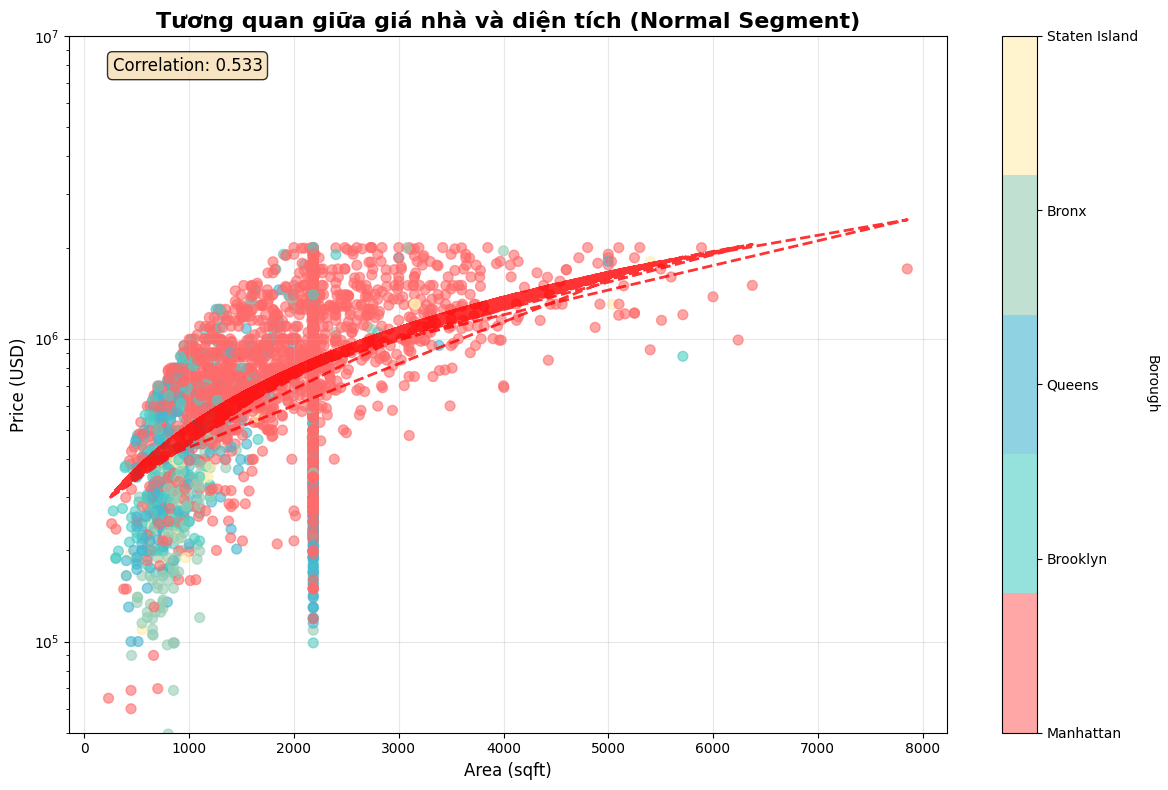

In [98]:
import matplotlib.colors  


# Nếu chỉ muốn Manhattan, lọc: df_normal = df_normal[df_normal['BOROUGH'] == 'Manhattan']

borough_mapping = {'Manhattan': 0, 'Brooklyn': 1, 'Queens': 2, 'Bronx': 3, 'Staten Island': 4}
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEEAD']  # Màu cố định

df_normal['BOROUGH_CODE'] = df_normal['BOROUGH'].map(borough_mapping)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_normal['PROPERTYSQFT'], df_normal['PRICE'], alpha=0.6, 
                      c=df_normal['BOROUGH_CODE'], cmap=matplotlib.colors.ListedColormap(colors), s=50)

# Thêm đường xu hướng
z = np.polyfit(df_normal['PROPERTYSQFT'], df_normal['PRICE'], 1)
p = np.poly1d(z)
plt.plot(df_normal['PROPERTYSQFT'], p(df_normal['PROPERTYSQFT']), "r--", alpha=0.8, linewidth=2)

# Thêm hệ số tương quan
correlation = df_normal[['PROPERTYSQFT', 'PRICE']].corr().iloc[0, 1]
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=plt.gca().transAxes, 
         fontsize=12, bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))

# Thêm colorbar với nhãn rời rạc
cbar = plt.colorbar(scatter, ticks=range(len(borough_mapping)))
cbar.set_ticklabels(list(borough_mapping.keys()))
cbar.set_label('Borough', rotation=270, labelpad=15)

plt.title('Tương quan giữa giá nhà và diện tích (Normal Segment)', fontsize=16, fontweight='bold')
plt.xlabel('Area (sqft)', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.yscale('log')
plt.ylim(50000, 10000000)
plt.grid(True, alpha=0.3)
plt.tight_layout()  
plt.show()

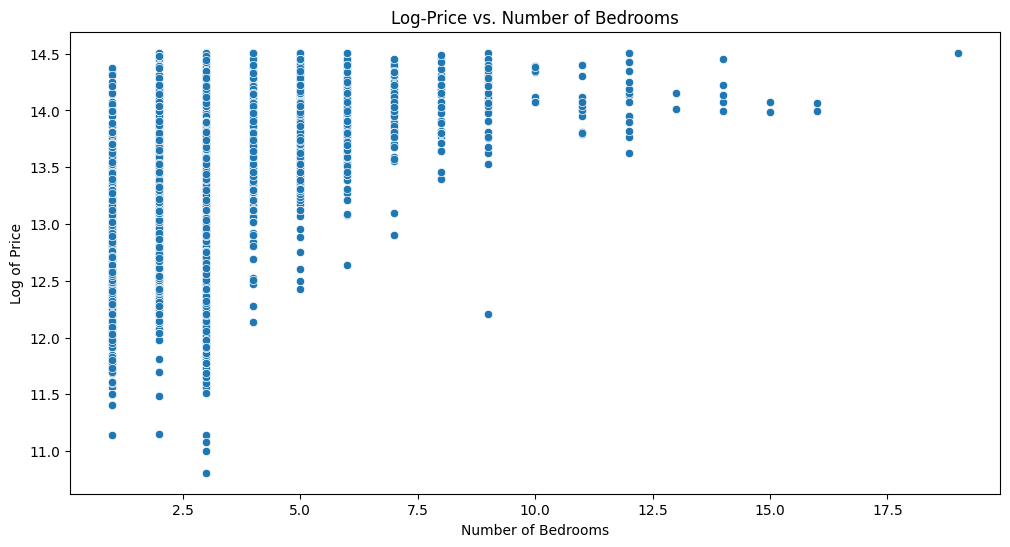

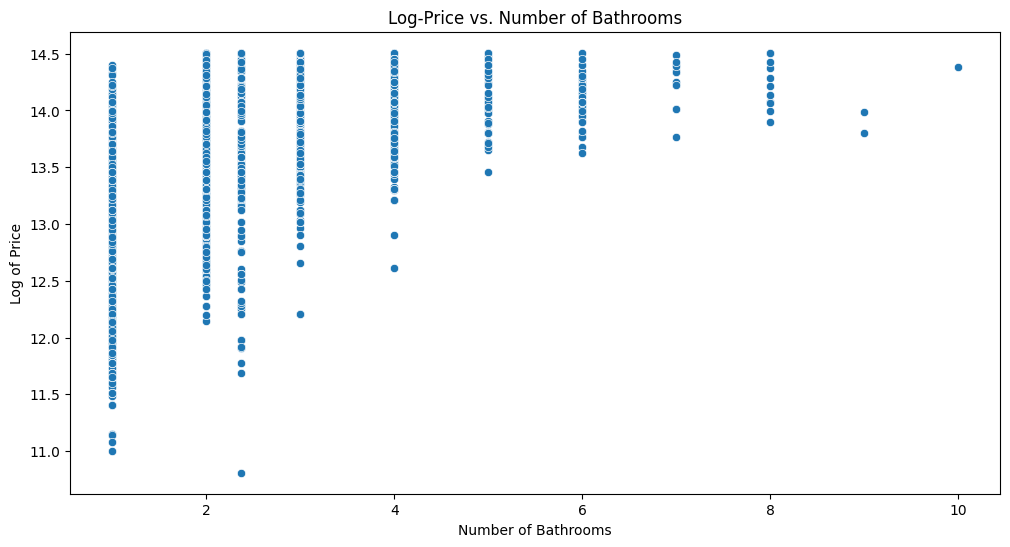

0.5233494602219808 0.5992716610400962


In [99]:
df_normal['LOG_PRICE'] = np.log(df_normal['PRICE'])

plt.figure(figsize=(12, 6))
sns.scatterplot(x='BEDS', y='LOG_PRICE', data=df_normal)
plt.title('Log-Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Log of Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='BATH', y='LOG_PRICE', data=df_normal)
plt.title('Log-Price vs. Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Log of Price')
plt.show()

beds_log_price_corr = df_normal['LOG_PRICE'].corr(df_normal['BEDS'])
bath_log_price_corr = df_normal['LOG_PRICE'].corr(df_normal['BATH'])

print(beds_log_price_corr, bath_log_price_corr)

In [100]:
import plotly.express as px

fig1 = px.scatter(df_normal, x='BEDS', y='PRICE', 
                  trendline='ols', 
                  labels={'PRICE': 'Price', 'BEDS': 'Number of Bedrooms'},
                  title='Price vs. Number of Bedrooms')
fig1.show()

fig2 = px.scatter(df_normal, x='BATH', y='PRICE', 
                  trendline='ols', 
                  labels={'PRICE': 'Price', 'BATH': 'Number of Bathrooms'},
                  title='Price vs. Number of Bathrooms')
fig2.show()

Số phòng là yếu tố quan trọng nhưng không quyết định duy nhất giá nhà.

In [101]:

average_price_per_broker = df_normal.groupby('BROKERTITLE')['PRICE'].mean().sort_values(ascending=False)

total_listings_per_broker = df_normal['BROKERTITLE'].value_counts()

price_range_per_broker = df_normal.groupby('BROKERTITLE')['PRICE'].agg(['min', 'max', 'median']).sort_values(by='median', ascending=False)

# Displaying the results
print("Các nhà môi giới có giá niêm yết trung vị cao nhất:")
print(price_range_per_broker.head())

print("\nCác nhà môi giới có giá niêm yết trung bình cao nhất:")
print(average_price_per_broker.head())

print("\nCác nhà môi giới có nhiều niêm yết nhất:")
print(total_listings_per_broker.head())

Các nhà môi giới có giá niêm yết trung vị cao nhất:
                              min      max     median
BROKERTITLE                                          
brick mortar              1995000  1995000  1995000.0
excellent                  468000  1990000  1990000.0
rubirosa                  1900000  1900000  1900000.0
myc  inc                  1900000  1900000  1900000.0
garfield leslie j co inc  1900000  1900000  1900000.0

Các nhà môi giới có giá niêm yết trung bình cao nhất:
BROKERTITLE
brick mortar                1995000.0
rubirosa                    1900000.0
garfield leslie j co inc    1900000.0
exit team                   1900000.0
myc  inc                    1900000.0
Name: PRICE, dtype: float64

Các nhà môi giới có nhiều niêm yết nhất:
BROKERTITLE
compass            259
re/max             246
keller williams    195
corcoran           174
douglas elliman    167
Name: count, dtype: int64


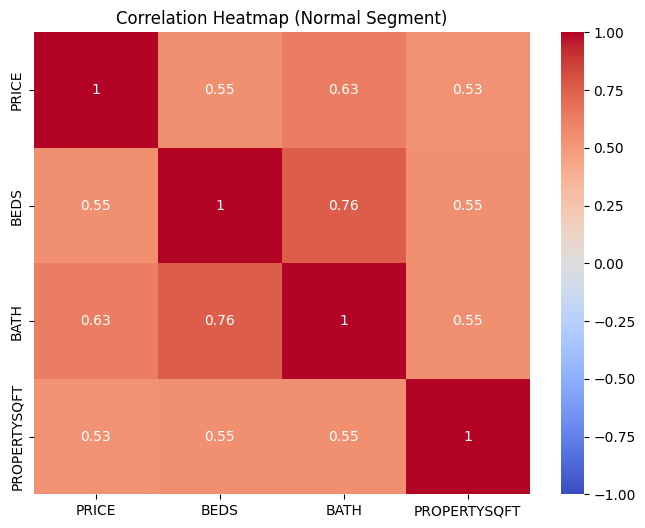

In [102]:
numeric_cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']
df_numeric = df_normal[numeric_cols].dropna()

# Tính ma trận tương quan
corr_matrix = df_numeric.corr()

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap (Normal Segment)')
plt.show()


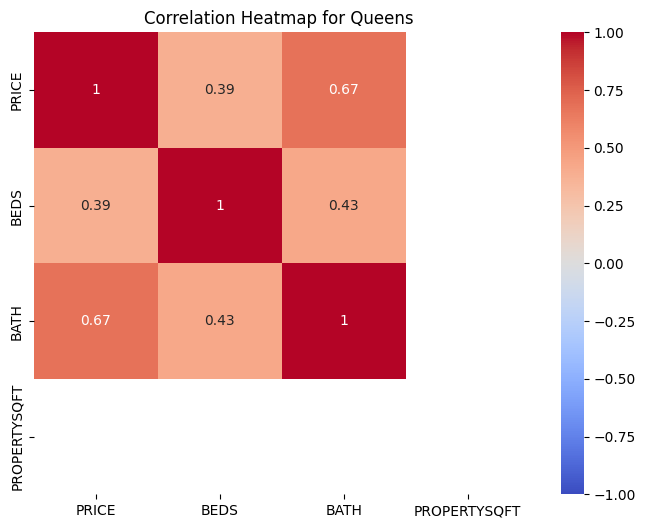

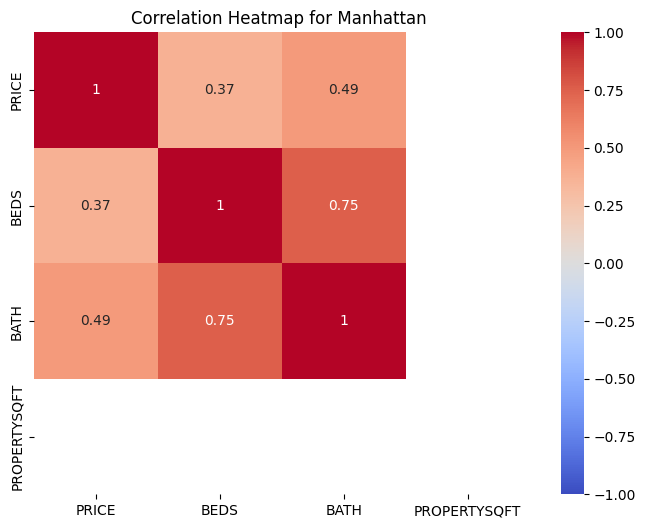

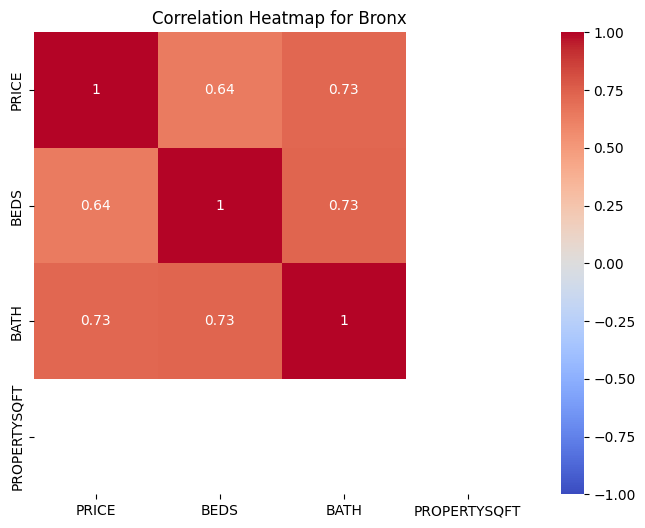

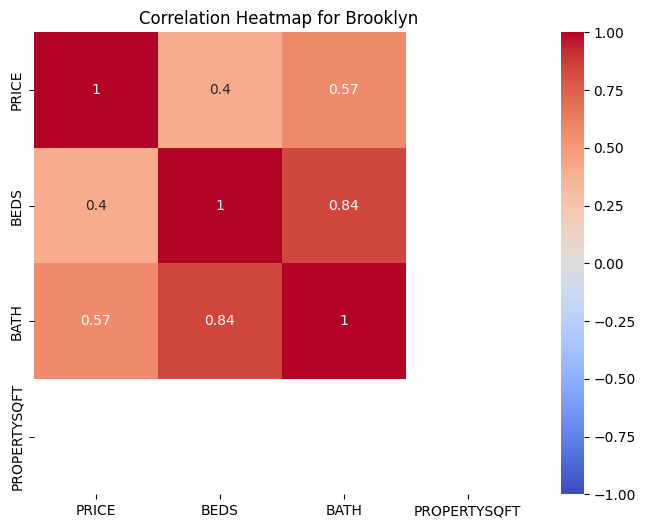

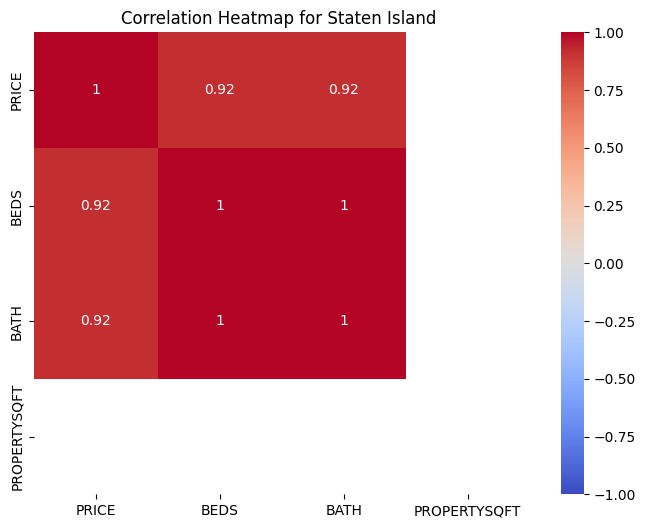

In [103]:
boroughs = df['BOROUGH'].unique()

# Vòng lặp qua từng quận để vẽ heatmap
for borough in boroughs:
    # Lọc dữ liệu theo quận
    df_borough = df[df['BOROUGH'] == borough]
    
    # Chọn các cột số
    numeric_cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']
    df_numeric = df_borough[numeric_cols].dropna()  # Loại bỏ giá trị NaN
    
    # Tính ma trận tương quan
    corr_matrix = df_numeric.corr()
    
    # Vẽ heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title(f'Correlation Heatmap for {borough} ')
    plt.show()

In [104]:
import plotly.express as px

fig = px.scatter_mapbox(df_normal, 
                        lat="LATITUDE", 
                        lon="LONGITUDE", 
                        color="PRICE", 
                        size="PRICE",
                        color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=15, 
                        zoom=10,
                        mapbox_style="carto-positron")

# Show the plot
fig.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13036\784580992.py:3: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



## Phân tích Broker (Nhà môi giới)

In [105]:
df_normal['BROKERTITLE'] = df_normal['BROKERTITLE'].str.replace("Brokered by ", "")

top_brokers = df_normal['BROKERTITLE'].value_counts().nlargest(10).reset_index()
top_brokers.columns = ['BROKERTITLE', 'LISTINGS_COUNT']

fig = px.bar(top_brokers, x='BROKERTITLE', y='LISTINGS_COUNT',
             title=" Các nhà môi giới hàng đầu theo số lượng niêm yết",
             labels={'LISTINGS_COUNT': 'Number of Listings', 'BROKERTITLE': 'Broker'})
fig.show()

In [106]:
top_10_brokers_list = top_brokers['BROKERTITLE'].tolist()
average_price_top_brokers = df_normal[df_normal['BROKERTITLE'].isin(top_10_brokers_list)].groupby('BROKERTITLE')['PRICE'].mean().reset_index()

fig = px.bar(average_price_top_brokers, x='BROKERTITLE', y='PRICE',
             title="Giá trung bình của các đơn vị được môi giới bởi 10 nhà môi giới hàng đầu    ",
             labels={'PRICE': 'Average Price', 'BROKERTITLE': 'Broker'})
fig.show()

In [107]:
import plotly.express as px


broker_locality_counts = df_normal.groupby(['BROKERTITLE', 'BOROUGH']).size().reset_index(name='LISTINGS_COUNT')

broker_locality_counts_top_10 = broker_locality_counts[broker_locality_counts['BROKERTITLE'].isin(top_10_brokers_list)]

fig = px.bar(broker_locality_counts_top_10, x='BROKERTITLE', y='LISTINGS_COUNT', color='BOROUGH',
             title="Phân bố địa lý của 10 nhà môi giới hàng đầu trên khắp các địa phương khác nhau",
             labels={'LISTINGS_COUNT': 'Number of Listings', 'BROKERTITLE': 'Broker', 'BOROUGH': 'Locality'})
fig.show()

In [108]:
df_top_10_brokers = df_normal[df_normal['BROKERTITLE'].isin(top_10_brokers_list)]

fig = px.scatter_mapbox(df_top_10_brokers, 
                        lat="LATITUDE", 
                        lon="LONGITUDE", 
                        color="BROKERTITLE", 
                        size="PRICE",
                        hover_data=['PRICE', 'BOROUGH'],
                        color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=15, 
                        zoom=10,
                        mapbox_style="carto-positron",
                        title="Phân bố địa lý của 10 nhà môi giới hàng đầu")

fig.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13036\4247372228.py:3: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [109]:
df_top_10_brokers_properties = df_normal[df_normal['BROKERTITLE'].isin(top_10_brokers_list)]

broker_property_characteristics_top_10 = df_top_10_brokers_properties.groupby('BROKERTITLE').agg({
    'PROPERTYSQFT': 'mean',  
    'BEDS': 'mean',          
    'BATH': 'mean',          
}).reset_index()

print(broker_property_characteristics_top_10)

            BROKERTITLE  PROPERTYSQFT      BEDS      BATH
0  brown harris stevens   1758.126525  2.043478  1.555669
1       coldwell banker   1935.882699  3.275862  2.224138
2               compass   1905.775648  2.517375  1.694476
3              corcoran   1711.498771  2.160920  1.535182
4       douglas elliman   1869.836337  2.491018  1.755219
5                   exp   1663.133930  3.207547  1.922148
6       keller williams   1816.878218  2.958974  1.836521
7                re/max   1782.047204  3.565041  2.322621
8    robert defalco inc   1909.375000  3.589286  2.444095
9           winzone inc   1820.600467  3.133333  1.916667


## luxury analyst


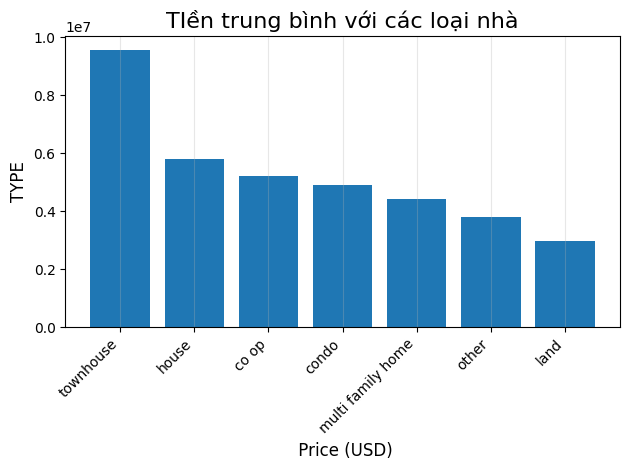

In [110]:
avg_type = df_luxury.groupby("PROPERTY_TYPE")['PRICE'].mean().reset_index()
avg_type = avg_type.sort_values(by = "PRICE",ascending=False)
avg_type
plt.bar(avg_type['PROPERTY_TYPE'],avg_type['PRICE'])
plt.xticks(rotation=45, ha='right')
plt.title('TIền trung bình với các loại nhà', fontsize=16)
plt.xlabel(' Price (USD)', fontsize=12)
plt.ylabel('TYPE', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

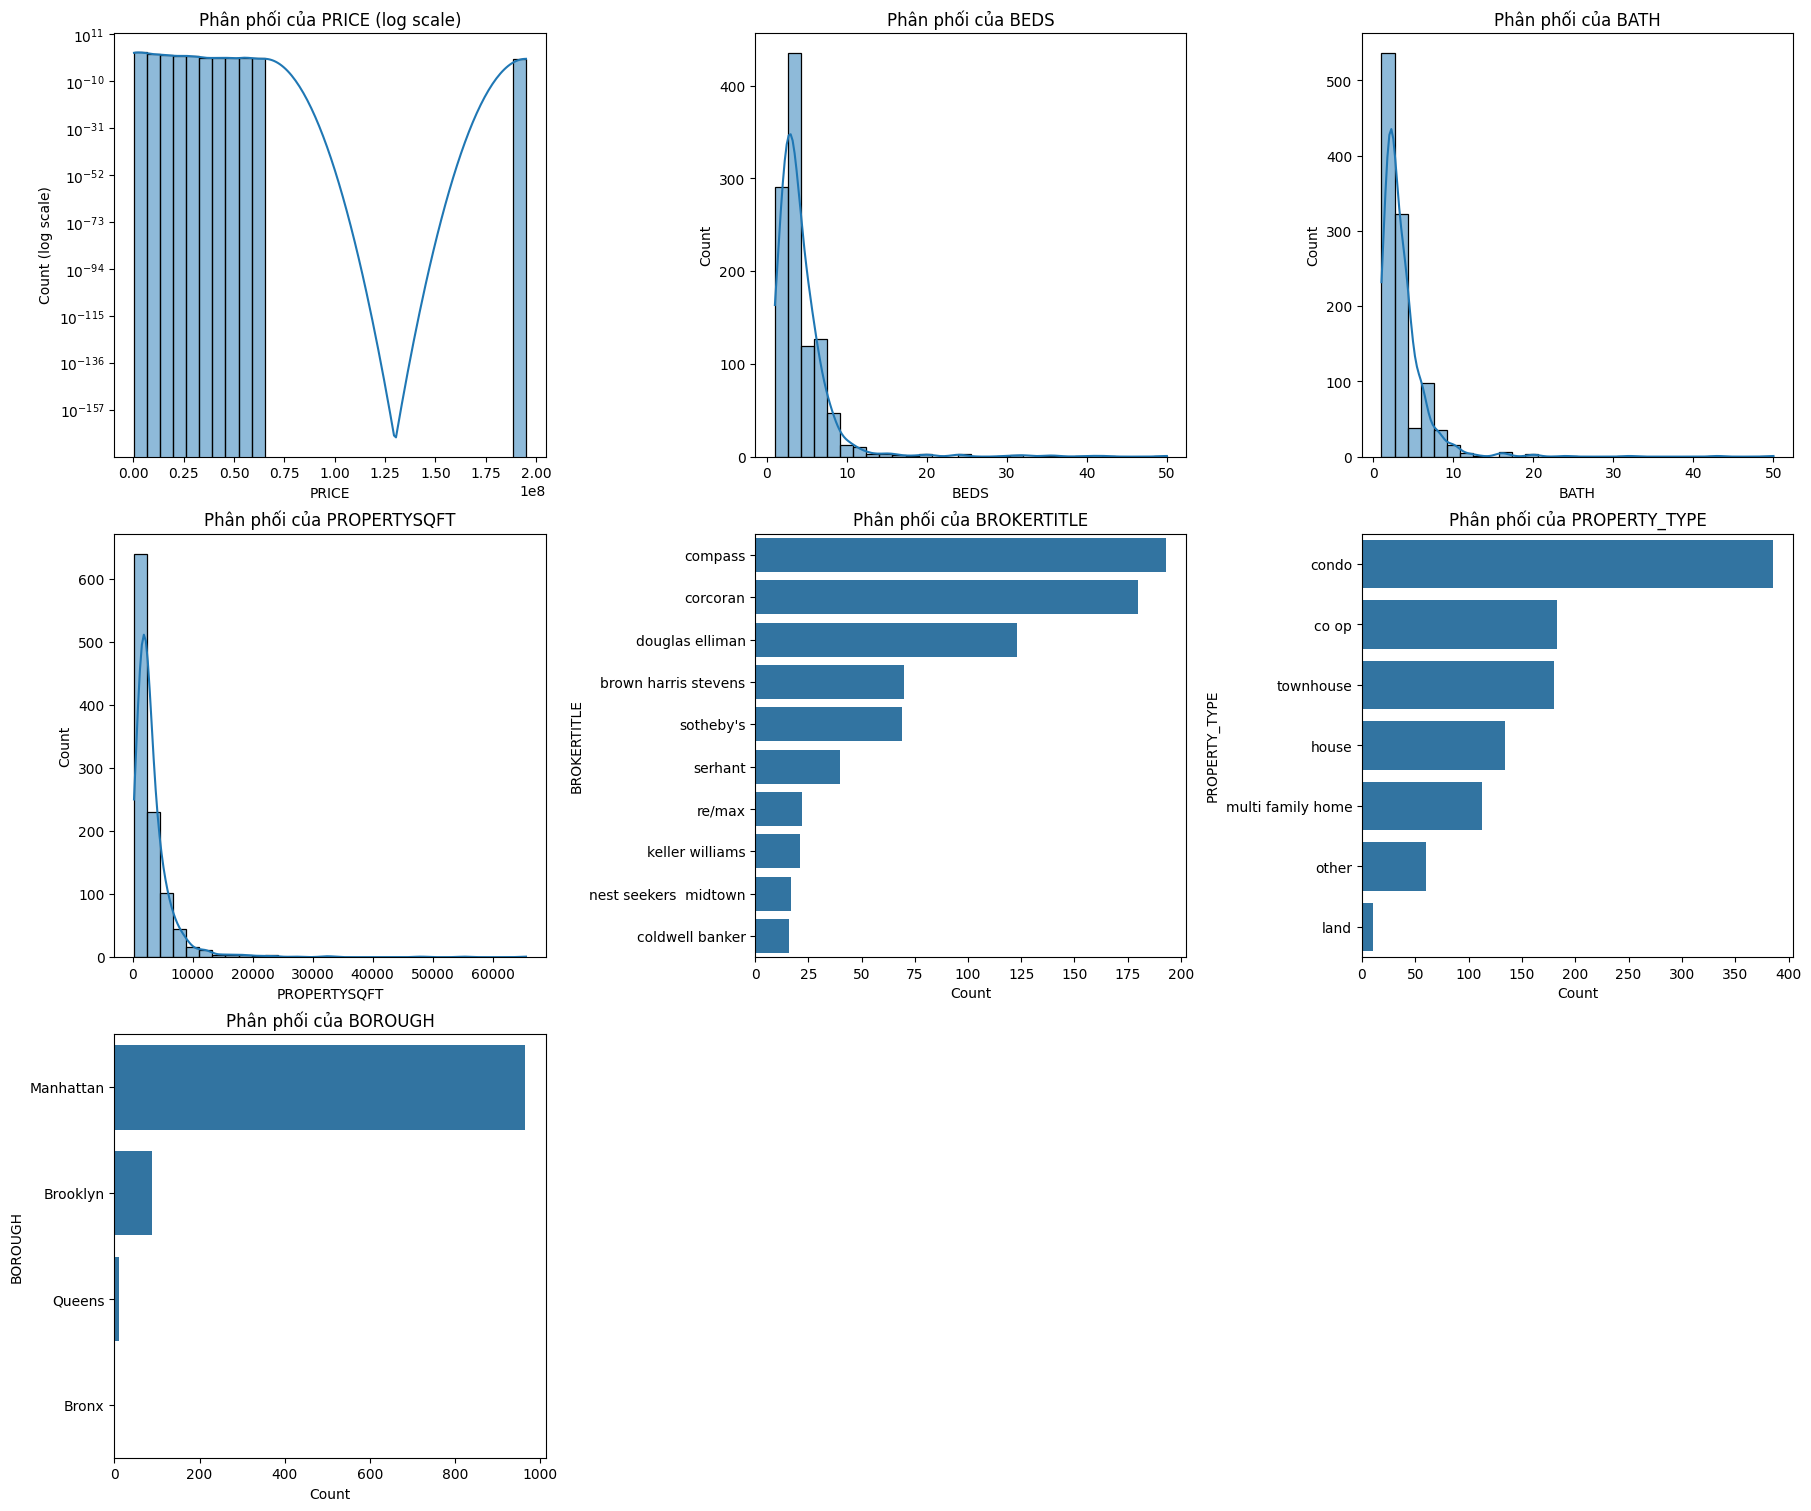

In [111]:
def plot_univariate_distribution(ax, df, column, plot_type='histogram'):
    if plot_type == 'histogram':
        sns.histplot(df[column], kde=True, bins=30, ax=ax)
        if column == 'PRICE':
            ax.set_yscale('log') 
            ax.set_title(f'Phân phối của {column} (log scale)')
            ax.set_ylabel('Count (log scale)')
        else:
            ax.set_title(f'Phân phối của {column}')
            ax.set_ylabel('Count')
        ax.set_xlabel(column)
    elif plot_type == 'countplot':
        sns.countplot(y=df[column], order=df[column].value_counts().index[:10], ax=ax)
        ax.set_title(f'Phân phối của {column}')
        ax.set_xlabel('Count')
        ax.set_ylabel(column)

# Danh sách các cột
numerical_cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']
categorical_cols = ['BROKERTITLE', 'PROPERTY_TYPE', 'BOROUGH']
all_cols = numerical_cols + categorical_cols

# Vẽ biểu đồ theo lưới 3 cột
n_cols = 3  
n_rows = (len(all_cols) + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()  

# Vẽ từng cột
for i, col in enumerate(all_cols):
    plot_type = 'histogram' if col in numerical_cols else 'countplot'
    plot_univariate_distribution(axes[i], df_luxury, col, plot_type=plot_type)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

### 1. Phân phối giá nhà (PRICE)
- Giá nhà luxury trải rộng từ **5M đến gần 200M USD**.  
- Phân phối lệch phải, nhưng khác với Normal, phần đuôi kéo dài tới hàng trăm triệu USD.  
- Xuất hiện rõ rệt một số **căn siêu sang (super luxury)** trên 50M, kéo trung bình giá lên cao.  

### 2. Phân phối số phòng ngủ (BEDS)
- Phổ biến từ **3–6 phòng ngủ**.  
- Xuất hiện một số căn biệt thự/townhouse có **10+ phòng ngủ**, hiếm nhưng đặc trưng cho phân khúc này.  

### 3. Phân phối số phòng tắm (BATH)
- Đa số có **3–6 phòng tắm**, đi kèm với số phòng ngủ lớn.  
- Một số ít trường hợp cực đoan có trên 10 phòng tắm → biệt thự hoặc căn hộ penthouse nhiều tầng.  

### 4. Phân phối diện tích (PROPERTYSQFT)
- Luxury chủ yếu từ **3,000 – 10,000 sqft**.  
- Một số căn cực lớn trên **20,000 sqft**, thường là biệt thự hoặc penthouse.  

### 5. Phân phối theo môi giới (BROKERTITLE)
- **Compass, Douglas Elliman, Corcoran** dẫn đầu số lượng listing luxury.  
- Các môi giới chuyên phân khúc cao cấp khác: **Serhant, Sotheby’s, Brown Harris Stevens**.  
- Thị trường luxury tập trung trong tay một số ít broker uy tín, mang tính chuyên biệt cao.  

### 6. Phân phối theo loại nhà (PROPERTY_TYPE)
- Luxury tập trung nhiều nhất vào **condo cao cấp và townhouse**.  
- House đơn lập và co-op có nhưng ít hơn.  
- Multi-family home hầu như không xuất hiện trong luxury.  

### 7. Phân phối theo khu vực (BOROUGH)
- **Manhattan áp đảo gần như tuyệt đối**, chỉ một phần rất nhỏ luxury ở Brooklyn.  
- Không có luxury ở Queens, Bronx hay Staten Island.  

---

#### 🔑 Insight chính từ phân tích đơn biến Luxury Segment
1. **Luxury ở NYC gần như đồng nghĩa với Manhattan**, nơi tập trung toàn bộ nguồn cung cao cấp.  
2. Giá dao động rộng, từ **5M – 200M USD**, với một số siêu phẩm kéo phân phối lên cực đoan.  
3. Đặc điểm căn hộ luxury: **diện tích lớn (3,000–10,000 sqft), nhiều phòng (3–6 phòng ngủ, 3–6 phòng tắm)**.  
4. Thị trường được chi phối bởi **một nhóm broker cao cấp**, nổi bật là Compass, Douglas Elliman, Corcoran, Serhant và Sotheby’s.  
5. **Condo & townhouse** là hình thức chính của luxury, phản ánh đặc thù đô thị Manhattan.  

➡️ Luxury segment tại NYC có tính tập trung cực cao về cả **địa lý (Manhattan)** lẫn **broker**. Đây là thị trường khác biệt hoàn toàn so với Normal segment, phục vụ nhóm khách hàng siêu giàu.


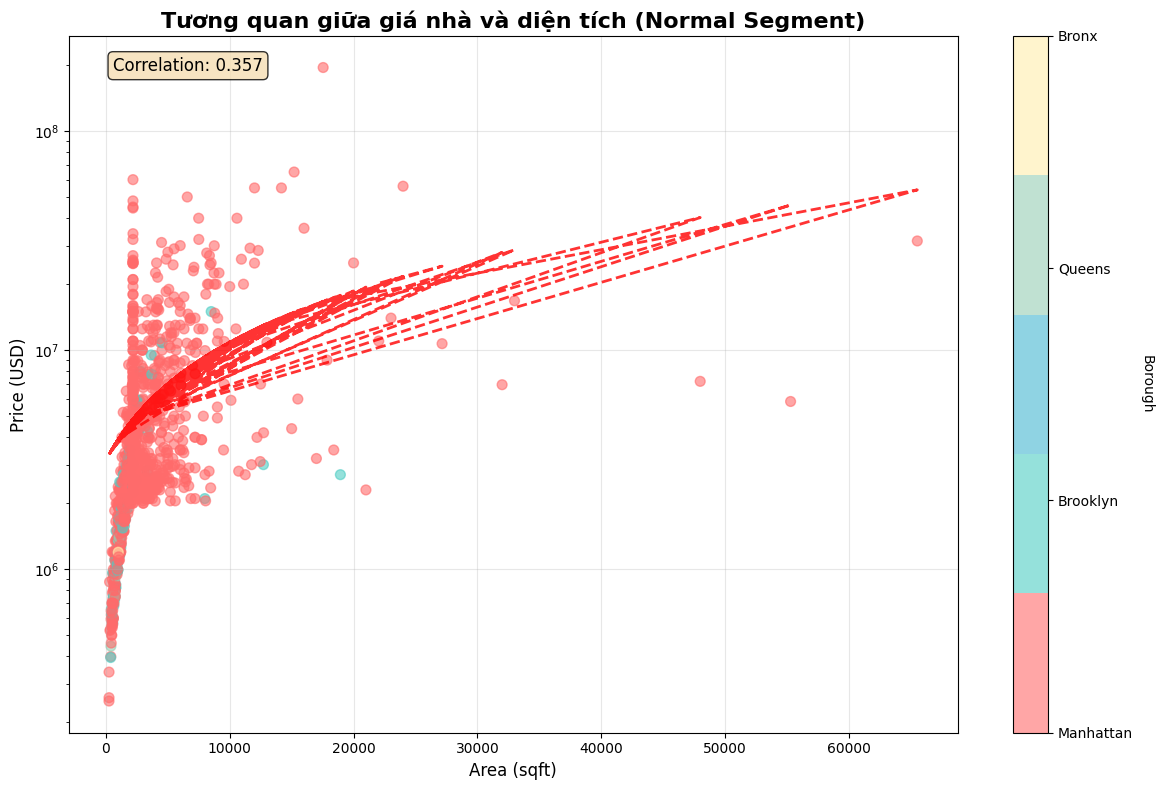

In [112]:


# Nếu chỉ muốn Manhattan, lọc: df_normal = df_normal[df_normal['BOROUGH'] == 'Manhattan']

borough_mapping = {'Manhattan': 0, 'Brooklyn': 1, 'Queens': 2, 'Bronx': 3, 'Staten Island': 4}
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEEAD']  # Màu cố định

df_luxury['BOROUGH_CODE'] = df_luxury['BOROUGH'].map(borough_mapping)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_luxury['PROPERTYSQFT'], df_luxury['PRICE'], alpha=0.6, 
                      c=df_luxury['BOROUGH_CODE'], cmap=matplotlib.colors.ListedColormap(colors), s=50)

# Thêm đường xu hướng
z = np.polyfit(df_luxury['PROPERTYSQFT'], df_luxury['PRICE'], 1)
p = np.poly1d(z)
plt.plot(df_luxury['PROPERTYSQFT'], p(df_luxury['PROPERTYSQFT']), "r--", alpha=0.8, linewidth=2)

# Thêm hệ số tương quan
correlation = df_luxury[['PROPERTYSQFT', 'PRICE']].corr().iloc[0, 1]
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=plt.gca().transAxes, 
         fontsize=12, bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))

# Thêm colorbar với nhãn rời rạc
cbar = plt.colorbar(scatter, ticks=range(len(borough_mapping)))
cbar.set_ticklabels(list(borough_mapping.keys()))
cbar.set_label('Borough', rotation=270, labelpad=15)

plt.title('Tương quan giữa giá nhà và diện tích (Normal Segment)', fontsize=16, fontweight='bold')
plt.xlabel('Area (sqft)', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.yscale('log')
# plt.ylim(50000, 10000000)
plt.grid(True, alpha=0.3)
plt.tight_layout()  
plt.show()

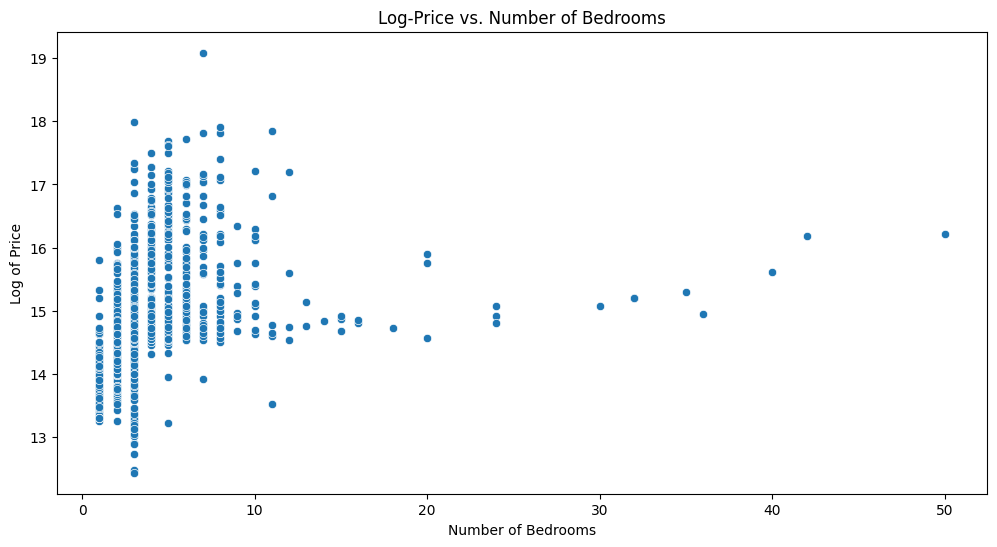

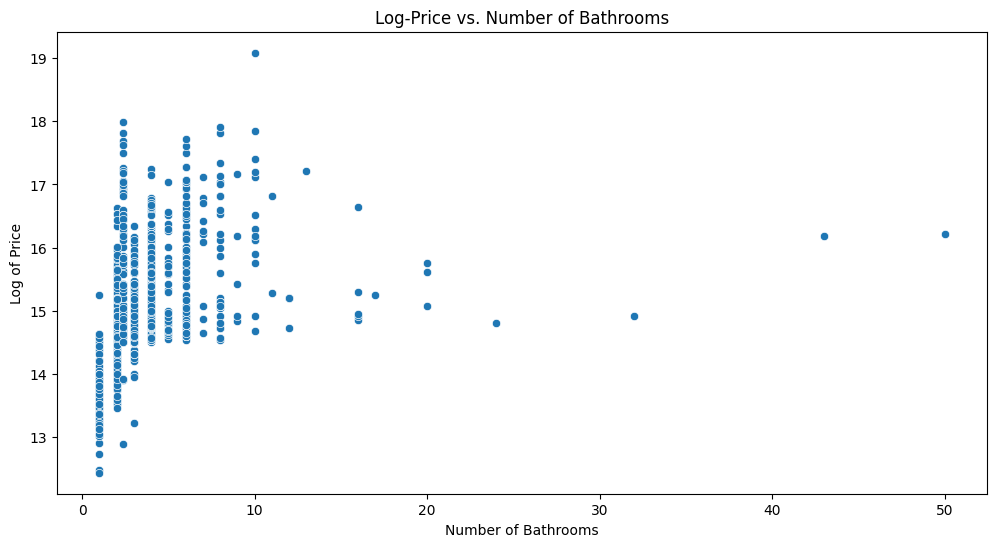

0.2644363322264557 0.37062943731491965


In [113]:
df_luxury['LOG_PRICE'] = np.log(df_luxury['PRICE'])

plt.figure(figsize=(12, 6))
sns.scatterplot(x='BEDS', y='LOG_PRICE', data=df_luxury)
plt.title('Log-Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Log of Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='BATH', y='LOG_PRICE', data=df_luxury)
plt.title('Log-Price vs. Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Log of Price')
plt.show()

beds_log_price_corr = df_luxury['LOG_PRICE'].corr(df_luxury['BEDS'])
bath_log_price_corr = df_luxury['LOG_PRICE'].corr(df_luxury['BATH'])

print(beds_log_price_corr, bath_log_price_corr)

In [114]:
import plotly.express as px

fig = px.scatter_mapbox(df_luxury, 
                        lat="LATITUDE", 
                        lon="LONGITUDE", 
                        color="PRICE", 
                        size="PRICE",
                        color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=15, 
                        zoom=10,
                        mapbox_style="carto-positron")

# Show the plot
fig.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13036\1400820636.py:3: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

